# Massive English Tokenization Test Runs on Parallell-100 Corpus - Test 

# References

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2655800/
- https://lena-voita.github.io/nlp_course/language_modeling.html
- https://en.wikipedia.org/wiki/Perplexity
- https://github.com/singnet/language-learning/issues/255
- https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7


- https://github.com/natasha/razdel - razdel tries to mimic segmentation of these 4 datasets: SynTagRus, OpenCorpora, GICRYA and RNC. 
- https://www.kaggle.com/c/text-normalization-challenge-english-language
- https://www.kaggle.com/c/text-normalization-challenge-russian-language




In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot


In [2]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_texts = list(test_df['en'])
print(len(test_texts))
test_df[['en']]

100


,en
0,What about medical insurance? As for my family...
1,"For those who have insurance, according to the..."
2,Need to realize the importance of having insur...
3,"In fact, this phenomenon is indeed very common..."
4,It is really necessary for this generation of ...
...,...
95,Ant Insurance does not only offer car insuranc...
96,"However, when buying a house, except for the d..."
97,This kind of financial investment has certain ...
98,"If your investment orientation is right, then ..."


In [3]:
for text in test_texts:
    print(text)

What about medical insurance? As for my family, either an adult or a child will buy insurance.
For those who have insurance, according to the insurance contract, they will get a compensation of 300 thousand yuan.
Need to realize the importance of having insurance.
In fact, this phenomenon is indeed very common, for instance, for personal accident insurance, the more you buy, the more you insure.
It is really necessary for this generation of parents to buy insurance.
Well, right now, it's really advisable to buy insurance.
A car must be bought in full, and a house can be bought with a loan.
You can buy insurance, insurance is of course divided into many categories.
Medical insurance is very important.
It's the insurance company that pays this part of the money.
Xianghubao, I don't know if you ever heard about it, it is insurance in Alipay.
Buying a house is actually an investment.
Have you ever learned about the training of Ping An Insurance?
If it is deposited in the bank, what is the 

In [4]:
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
#thresholds = [0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


In [5]:
ref_tokenizer = DelimiterTokenizer()

In [16]:
#TODO test capitalization!!!
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
model_compress_with_loss(brown_chars.model,0.0001)
tokenizer = FreedomBasedTokenizer(brown_chars,'ddf-','ddf+')


In [21]:
tokenizer.set_options(nlist = [1], threshold=0.35)
text = "Tom said 'Jim's right!', Ann"
#text = "Call 'Jim !' now"
print(ref_tokenizer.tokenize(text))
print(tokenizer.tokenize(text))
print(tokenizer.tokenize(text.lower()))
print(tokenizer.tokenize(text.upper()))


['Tom', ' ', 'said', ' ', "'", "Jim's", ' ', 'right', '!', "'", ',', ' ', 'Ann']
['Tom', ' ', 'said', ' ', "'", 'Jim', "'", 's', ' ', 'right!', "'", ',', ' ', 'Ann']
['tom', ' ', 'said', ' ', "'", 'jim', "'", 's', ' ', 'right!', "'", ',', ' ', 'ann']
['TOM', ' ', 'SAID', ' ', "'", 'JIM', "'", 'S', ' ', 'RIGHT!', "'", ',', ' ', 'ANN']


In [22]:
evaluate_tokenizer_f1([text,text.lower(),text.upper()],ref_tokenizer,tokenizer,True)


Tom said 'Jim's right!', Ann
0.74 ['Tom', ' ', 'said', ' ', "'", 'Jim', "'", 's', ' ', 'right!', "'", ',', ' ', 'Ann']
tom said 'jim's right!', ann
0.74 ['tom', ' ', 'said', ' ', "'", 'jim', "'", 's', ' ', 'right!', "'", ',', ' ', 'ann']
TOM SAID 'JIM'S RIGHT!', ANN
0.74 ['TOM', ' ', 'SAID', ' ', "'", 'JIM', "'", 'S', ' ', 'RIGHT!', "'", ',', ' ', 'ANN']


0.74

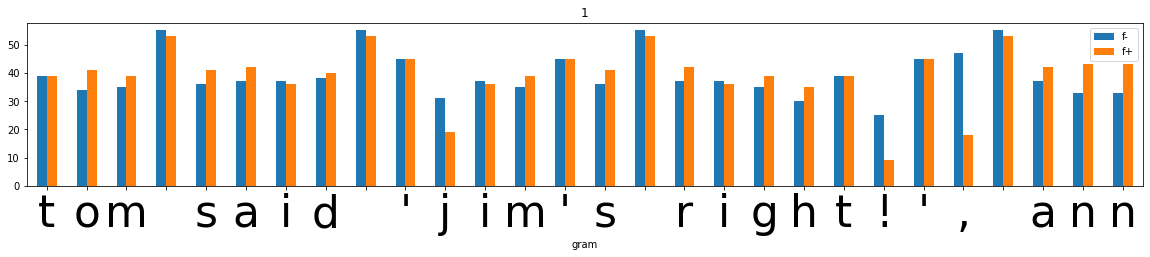

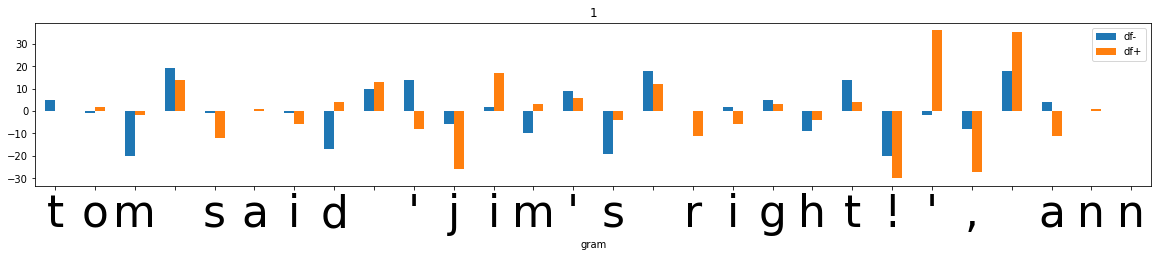

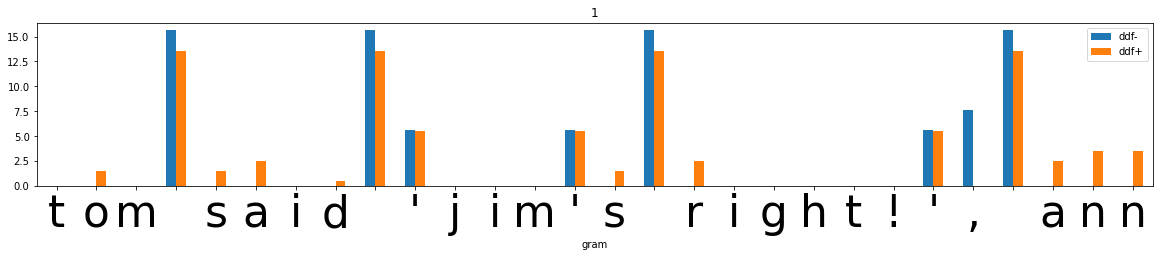

In [32]:
for i in range(1,1+1):
    df = profile_freedoms_ex_df(brown_chars.model,text.lower(),i)
    plot_bars(df,'gram',['f-','f+'],title=str(i))
    plot_bars(df,'gram',['df-','df+'],title=str(i))
    plot_bars(df,'gram',['ddf-','ddf+'],title=str(i))


In [23]:
a = tokenize_with_opposite_metrics(brown_chars.model,text,'ddf-','ddf+',[1],threshold=0.4,profiler=profile_freedoms_avg_df,debug=True)
print(a)
a = tokenize_with_opposite_metrics(brown_chars.model,text.lower(),'ddf-','ddf+',[1],threshold=0.4,profiler=profile_freedoms_avg_df,debug=True)
print(a)


t			0.0	0.0	T
o			0.0	0.11	To
m	-		0.0	0.0	Tom
 		+	1.0	1.0	 
s			0.0	0.11	s
a			0.0	0.19	sa
i			0.0	0.0	sai
d	-		0.0	0.04	said
 		+	1.0	1.0	 
'		+	0.36	0.41	'
j			0.0	0.0	J
i			0.0	0.0	Ji
m			0.0	0.0	Jim
'		+	0.36	0.41	Jim'
s	-		0.0	0.11	s
 		+	1.0	1.0	 
r			0.0	0.19	r
i			0.0	0.0	ri
g			0.0	0.0	rig
h			0.0	0.0	righ
t			0.0	0.0	right
!			0.0	0.0	right!
'	-	+	0.36	0.41	right!'
,	-		0.49	0.0	,
 		+	1.0	1.0	 
a			0.0	0.19	A
n			0.0	0.26	An
n			0.0	0.26	Ann
['Tom', ' ', 'said', ' ', "'", "Jim'", 's', ' ', "right!'", ',', ' ', 'Ann']
t			0.0	0.0	t
o			0.0	0.11	to
m	-		0.0	0.0	tom
 		+	1.0	1.0	 
s			0.0	0.11	s
a			0.0	0.19	sa
i			0.0	0.0	sai
d	-		0.0	0.04	said
 		+	1.0	1.0	 
'		+	0.36	0.41	'
j			0.0	0.0	j
i			0.0	0.0	ji
m			0.0	0.0	jim
'		+	0.36	0.41	jim'
s	-		0.0	0.11	s
 		+	1.0	1.0	 
r			0.0	0.19	r
i			0.0	0.0	ri
g			0.0	0.0	rig
h			0.0	0.0	righ
t			0.0	0.0	right
!			0.0	0.0	right!
'	-	+	0.36	0.41	right!'
,	-		0.49	0.0	,
 		+	1.0	1.0	 
a			0.0	0.19	a
n			0.0	0.26	an
n			0.0	0.26	ann
['tom

In [27]:
brown_chars.model[2]['!']

{'"': 350,
 'e': 69,
 't': 45,
 '4': 1,
 'n': 45,
 '}': 1,
 'g': 21,
 'r': 21,
 'd': 25,
 'o': 18,
 'm': 20,
 's': 53,
 'p': 13,
 'a': 12,
 'y': 29,
 'h': 14,
 'w': 14,
 'l': 18,
 'f': 1,
 'k': 9,
 "'": 8,
 'c': 3,
 ',': 1,
 'u': 4,
 'b': 1}

In [28]:
brown_chars.model[2]['\'']

{'a': 209,
 't': 1072,
 'y': 749,
 'r': 725,
 'e': 1360,
 'd': 365,
 'l': 253,
 'n': 3230,
 's': 530,
 ' ': 273,
 'o': 274,
 'i': 759,
 'k': 114,
 'u': 368,
 'm': 120,
 '#': 11,
 '0': 60,
 'h': 134,
 'w': 42,
 '&': 20,
 'z': 7,
 'f': 36,
 'b': 42,
 'p': 42,
 'c': 40,
 'g': 109,
 'v': 22,
 '3': 2,
 '2': 22,
 '>': 3,
 'x': 30,
 '4': 22,
 "'": 62,
 '8': 10,
 '1': 5,
 '6': 7,
 '5': 3,
 '-': 5,
 '7': 2,
 '<': 1,
 '9': 1,
 '(': 12,
 '"': 6,
 'q': 1,
 'j': 1}

In [ ]:
#TEST exclamation!!!
